In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('data/sin_synth/SIN_NORMAL_500_v2.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,2.660293,3.056744,-54.787036,147.531109,-127.049232,92.973527,-106.050250,86.720460,-28.215510,105.774728,...,-78.753511,10.121191,-79.401384,137.907317,33.417117,NaN,NaN,NaN,0.618168,0.0
1,43.003942,-137.208256,80.354776,-13.665030,95.036263,68.104365,135.226084,-17.488579,-83.678686,208.638704,...,-168.042861,-36.327714,-39.011280,-31.864061,103.265420,NaN,NaN,NaN,0.518792,0.0
2,9.471141,63.497215,-31.482380,-103.339378,202.875207,-8.517136,-61.251503,113.188059,110.701716,48.484166,...,72.351982,-6.083924,47.765295,-120.517771,133.320785,NaN,NaN,NaN,0.377066,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.695814
std        0.213933
min        0.162652
25%        0.489618
50%        0.760636
75%        0.894511
max        0.999123
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
args = {
    "dist_function": "original",
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x774bd324bad8>,
 'dist_func_returns': False,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'fitness': <function gendis.fitness.logloss_fitness(X, y, shapelets, dist_function

In [12]:
%%time
gendis.fit(X_train, y_train)

it		avg		std		max		time
1		-0.2116		0.121		-0.042116	1.4806
2		-0.1184		0.065		-0.001049	1.938
3		-0.0574		0.048		-0.000228	2.429
4		-0.0236		0.026		-9e-05	3.1183
5		-0.006		0.015		-7e-05	3.8181
6		-0.0016		0.006		-6.9e-05	3.3284
7		-0.0003		0.0		-5.3e-05	3.8049
8		-0.0001		0.0		-4.6e-05	4.1467
9		-0.0001		0.0		-4.4e-05	3.8512
10		-0.0001		0.0		-3.8e-05	3.9413
11		-0.0003		0.003		-2.7e-05	4.8714
12		-0.0001		0.0		-2.6e-05	4.51
13		-0.0		0.0		-2.6e-05	5.7588
14		-0.0		0.0		-2.6e-05	6.3988
15		-0.0		0.0		-2.6e-05	6.5742
16		-0.0		0.0		-2.5e-05	6.769
17		-0.0		0.0		-2.5e-05	7.2851
18		-0.0		0.0		-2e-05	6.3293
19		-0.0		0.0		-1.8e-05	6.0401
20		-0.0		0.0		-1.7e-05	6.2253
21		-0.0		0.0		-1.7e-05	6.0226
22		-0.0		0.0		-1.7e-05	6.3832
23		-0.0		0.0		-1.7e-05	6.6945
24		-0.0		0.0		-1.2e-05	7.2759
25		-0.0		0.0		-1.2e-05	6.4737
26		-0.0		0.0		-1.2e-05	6.1205
27		-0.0		0.0		-1.1e-05	6.6766
28		-0.0		0.0		-1.1e-05	5.9911
29		-0.0		0.0		-1e-05	5.5016
30		-0.0		0.0		-9e-06	6.561
31		-0.0		0.0		-9e-

In [13]:
%%time
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 7.26 s, sys: 199 µs, total: 7.26 s
Wall time: 7.25 s


In [14]:
dists = pd.DataFrame(distances_train)
dists.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,329.095367,750.378662,94.521530,559.716187,857.010132,84.790581,90.904892,284.932922,922.302612,285.457123,...,231.849167,249.305786,813.998047,836.148438,958.242676,992.773926,306.119415,457.400269,529.586243,449.519897
1,126.803940,621.937378,286.092743,613.822998,803.274048,41.008942,30.807953,104.965652,840.518555,313.322601,...,267.386047,118.688850,757.767639,803.106445,938.022705,854.400146,301.579956,385.840149,569.047241,472.915009
2,344.614624,702.031738,401.765991,573.591309,837.420349,54.287014,50.611797,298.513336,890.453918,468.131348,...,419.831879,312.796387,858.884460,873.098022,971.782410,969.237732,317.146332,432.672638,559.479675,412.794373
3,382.928955,711.406067,394.070465,619.205750,881.491333,39.531471,43.479946,338.379089,796.669861,483.230988,...,447.380127,329.568909,910.784546,858.210205,973.620911,962.260193,324.466614,508.410187,529.391174,463.308746
4,132.475601,620.350586,307.430206,612.657104,790.246582,43.466774,52.620865,87.370323,781.777832,299.250122,...,292.556030,126.399063,695.435242,715.606262,890.625916,837.562866,281.853210,438.308716,576.868469,421.999847


In [15]:
dists["label"] = y_train.values
dists["label"].value_counts()
dists.index = X_train.index
dists[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

In [16]:
def test_shapelet_separation(shap, shap_id):
    axs_multiplier = 0.75
    f, axs = plt.subplots(1, 3, figsize=(3*axs_multiplier*6.4, axs_multiplier*4.8))
    print(f"Testing separation for shapelet {shap_id}")
    
    # Shapelet plot
    axs[0].plot(shap)
    
    # Distance histograms plot
    bins = np.linspace(0, 120, 20)
    axs[1].hist(dists.loc[dists['label']==0, shap_id], alpha=0.5, label='sin=false')
    axs[1].hist(dists.loc[dists['label']==1, shap_id], alpha=0.5, label='sin=true')
    axs[1].legend(loc='upper right')
    
    # Distance versus sin_y
    dists.plot.scatter(x='sin_y', y=shap_id, c='DarkBlue', ax=axs[2])
    
    
    # Accuracy using the shapelet as feature
    single_shapelet_train = distances_train[:, shap_id].reshape(-1, 1)
    single_shapelet_test = distances_test[:, shap_id].reshape(-1, 1)
    
    lr = LogisticRegression()
    lr.fit(single_shapelet_train, y_train)
    y_pred = lr.predict(single_shapelet_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy = {acc}')
    print(confusion_matrix(y_test, y_pred))
    
    plt.show()

Testing separation for shapelet 0
Accuracy = 0.955
[[193   7]
 [ 11 189]]


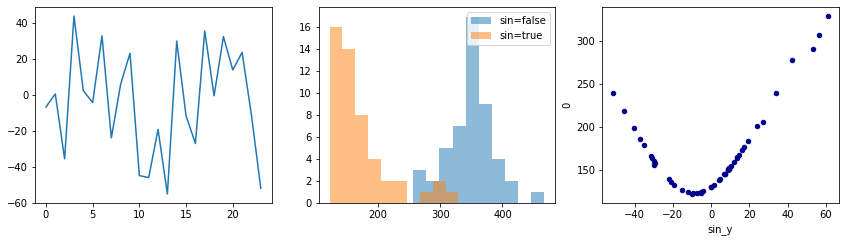

Testing separation for shapelet 1
Accuracy = 0.865
[[179  21]
 [ 33 167]]


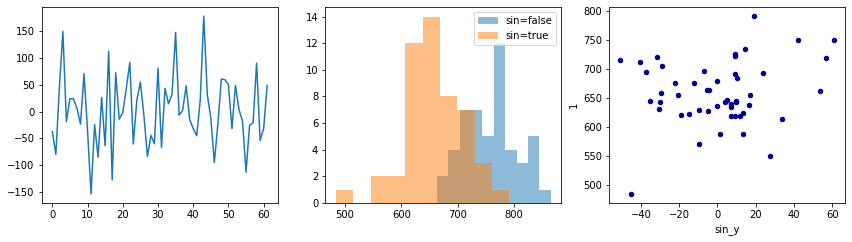

Testing separation for shapelet 2
Accuracy = 0.9025
[[182  18]
 [ 21 179]]


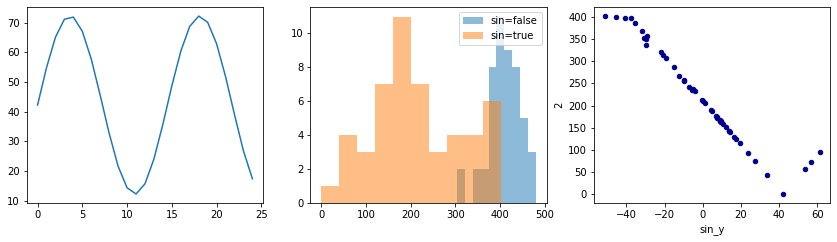

Testing separation for shapelet 3
Accuracy = 0.5
[[  0 200]
 [  0 200]]


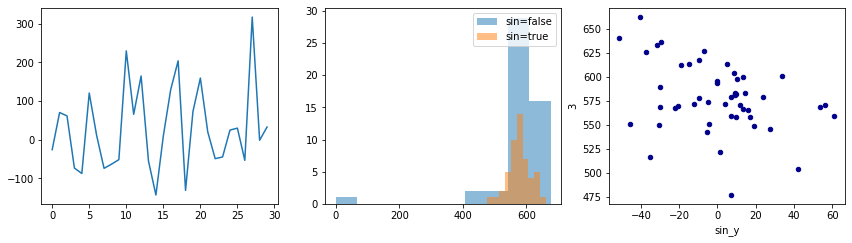

Testing separation for shapelet 4
Accuracy = 0.7875
[[167  33]
 [ 52 148]]


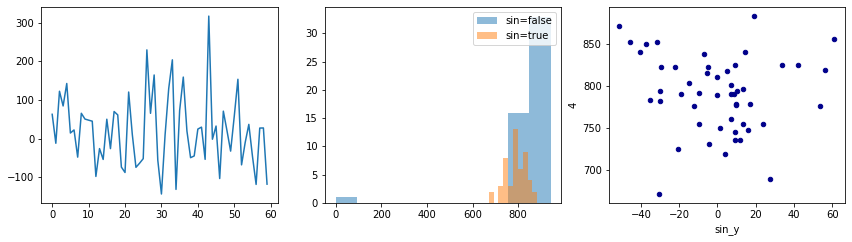

Testing separation for shapelet 5
Accuracy = 0.5525
[[111  89]
 [ 90 110]]


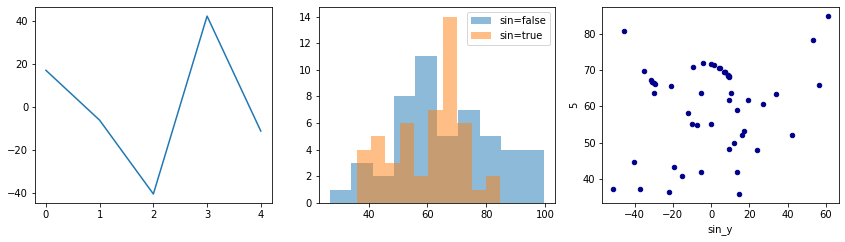

Testing separation for shapelet 6
Accuracy = 0.53
[[ 96 104]
 [ 84 116]]


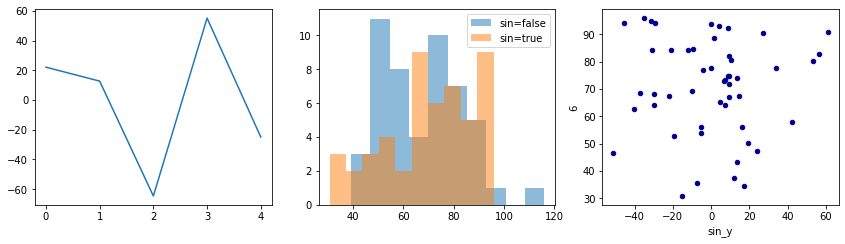

Testing separation for shapelet 7
Accuracy = 0.8375
[[177  23]
 [ 42 158]]


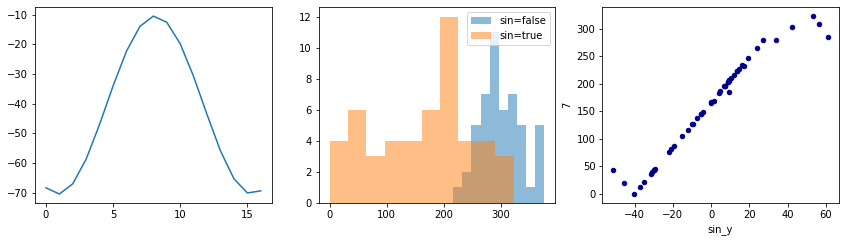

Testing separation for shapelet 8
Accuracy = 0.84
[[173  27]
 [ 37 163]]


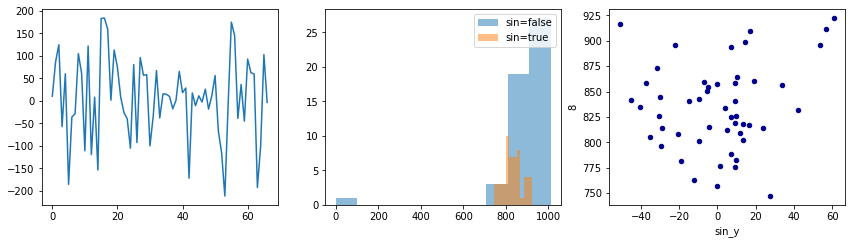

Testing separation for shapelet 9
Accuracy = 0.935
[[188  12]
 [ 14 186]]


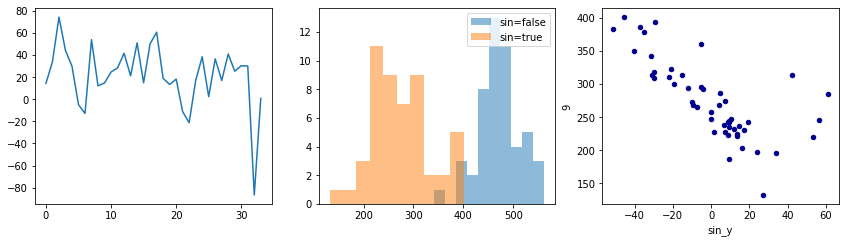

Testing separation for shapelet 10
Accuracy = 0.545
[[111  89]
 [ 93 107]]


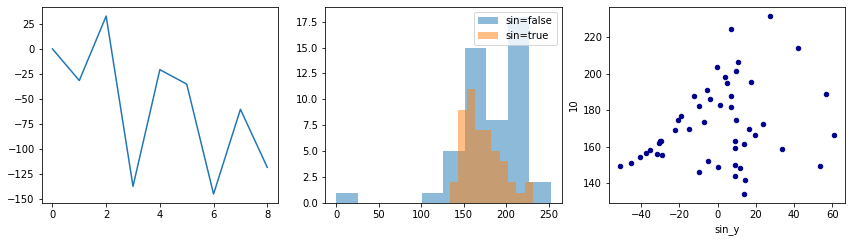

Testing separation for shapelet 11
Accuracy = 0.53
[[108  92]
 [ 96 104]]


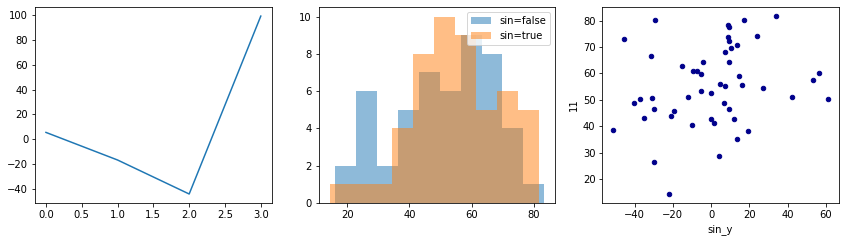

Testing separation for shapelet 12
Accuracy = 0.4725
[[ 98 102]
 [109  91]]


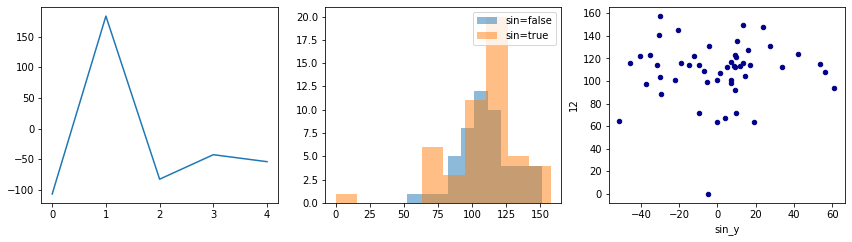

Testing separation for shapelet 13
Accuracy = 0.8475
[[169  31]
 [ 30 170]]


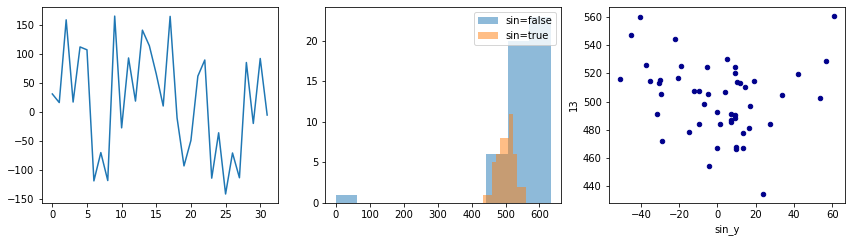

Testing separation for shapelet 14
Accuracy = 0.8975
[[184  16]
 [ 25 175]]


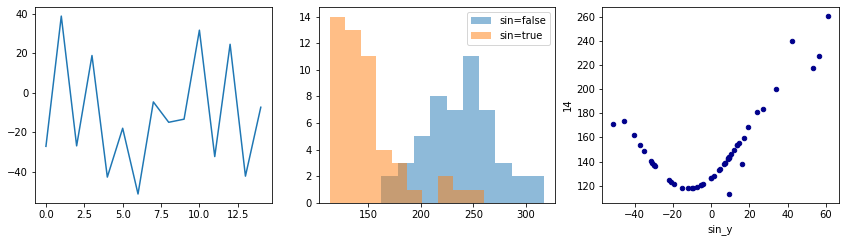

Testing separation for shapelet 15
Accuracy = 0.9575
[[193   7]
 [ 10 190]]


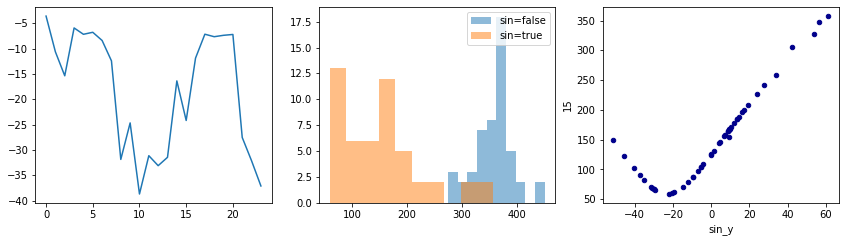

Testing separation for shapelet 16
Accuracy = 0.9325
[[187  13]
 [ 14 186]]


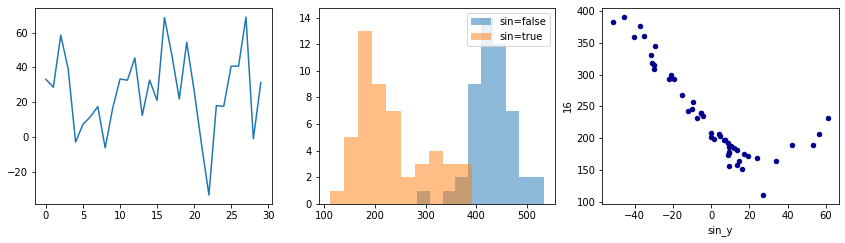

Testing separation for shapelet 17
Accuracy = 0.9625
[[193   7]
 [  8 192]]


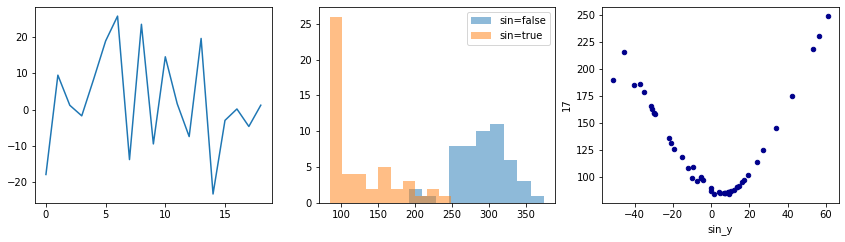

Testing separation for shapelet 18
Accuracy = 0.825
[[165  35]
 [ 35 165]]


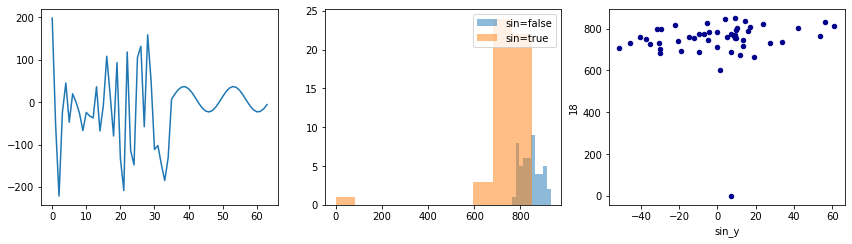

Testing separation for shapelet 19
Accuracy = 0.7975
[[155  45]
 [ 36 164]]


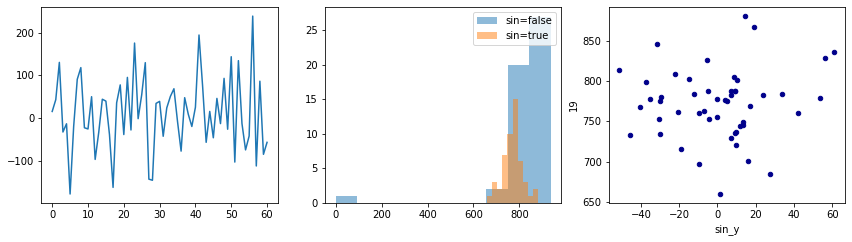

Testing separation for shapelet 20
Accuracy = 0.5
[[200   0]
 [200   0]]


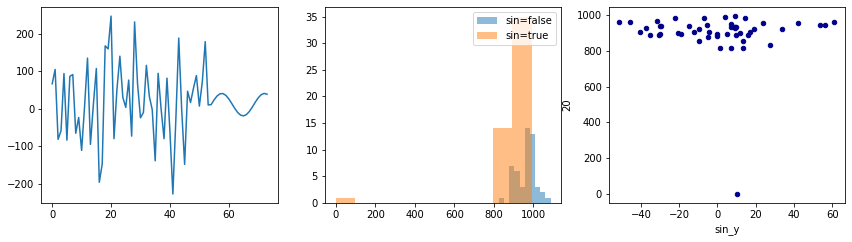

Testing separation for shapelet 21
Accuracy = 0.82
[[169  31]
 [ 41 159]]


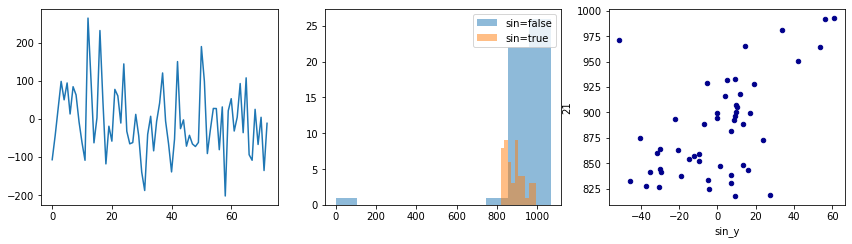

Testing separation for shapelet 22
Accuracy = 0.5675
[[ 90 110]
 [ 63 137]]


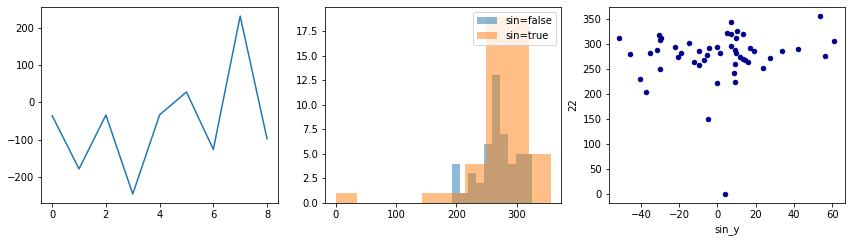

Testing separation for shapelet 23
Accuracy = 0.6825
[[141  59]
 [ 68 132]]


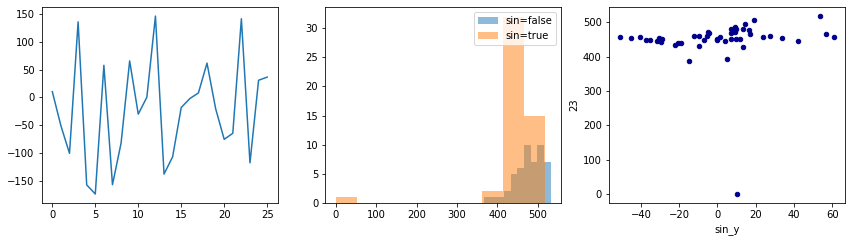

Testing separation for shapelet 24
Accuracy = 0.805
[[164  36]
 [ 42 158]]


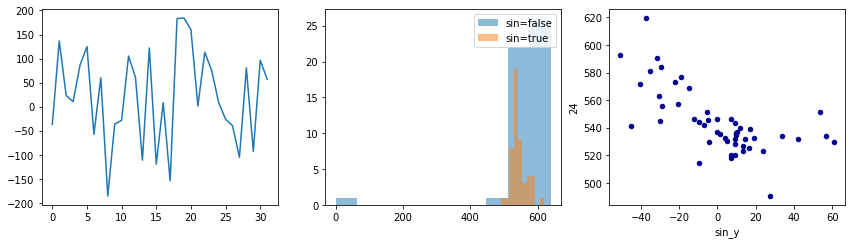

Testing separation for shapelet 25
Accuracy = 0.555
[[130  70]
 [108  92]]


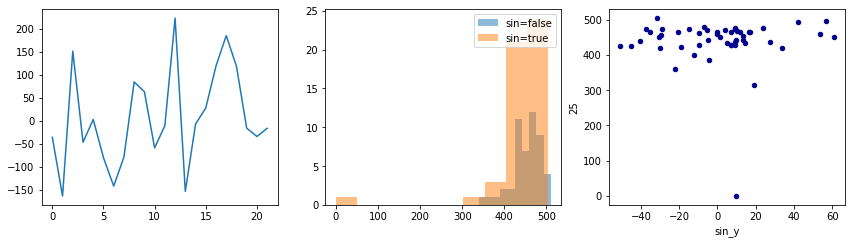

In [17]:
for i, shap in enumerate(gendis.shapelets, start=0):
    test_shapelet_separation(shap, i)

### Persistence of results

In [ ]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = './test_sin_results/'
os.makedirs(folder, exist_ok=True)

dists.to_csv(f'{folder}/test_sin_500_fixed_nonoise_distmatrix_{ts}.csv', header=False, index=False)


with open(f'{folder}/gendis_{ts}.pickle', 'wb') as file_handler:
    pickle.dump(gendis, file_handler, protocol=pickle.HIGHEST_PROTOCOL)